In [15]:
import re
def tokenize(sentence):
    return [i for i in re.split(r"([-.\"',:? !\$#@~()*&\^%;\[\]/\\\+<>\n=])", sentence) if i!='' and i!=' ' and i!='\n']

In [16]:
question = "How many food item is shown in the bar graph?"

In [17]:
tokenize(question)

In [18]:
def tokenize_mcb(s):
    t_str = s.lower()
    for i in [r'\?',r'\!',r'\'',r'\"',r'\$',r'\:',r'\@',r'\(',r'\)',r'\,',r'\.',r'\;']:
        t_str = re.sub( i, '', t_str)
    for i in [r'\-',r'\/']:
        t_str = re.sub( i, ' ', t_str)
    q_list = re.sub(r'\?','',t_str.lower()).split(' ')
    q_list = list(filter(lambda x: len(x) > 0, q_list))
    return q_list

In [19]:
tokenize_mcb(question)

In [20]:
import click

if click.confirm('测试是不是',default=False):
    print("true")
else:
    print("false")

In [21]:
from PIL import Image

img = Image.open("data/ChartQA/test/png/166.png")
img

In [22]:
import numpy as np

img = np.array(img)

In [23]:
img.transpose(2,0,1).shape

In [24]:
img.shape

In [25]:
import json
def getChartQA(qa_files):
    answers = list()
    for file in qa_files:
        qas = json.load(open(file, 'r',encoding="utf-8"))
        for qa in qas:
            answers.append(qa["label"])
    return list(set(answers))

In [ ]:
answers = getChartQA(["data/ChartQA/train/train_augmented.json"])

In [ ]:
len(answers)

In [ ]:
with open("test.txt",'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    word2idx = {w_n:w for w,w_n in enumerate(lines)}
    
print(word2idx)

In [ ]:
import evaluate
evaluate.list_evaluation_modules(include_community=True,with_details=True) # 查看支持的模型

In [ ]:
accuracy = evaluate.load("accuracy")

In [ ]:
print(accuracy.description)

In [ ]:
print(accuracy.inputs_description)

In [ ]:
accuracy.compute(references=[1,2,1,1],predictions=[1,2,1,2])

In [ ]:
from model.models.VGG import VGGModule
from data.FigureQADatasets import dataloader
from tqdm import tqdm


model = VGGModule("cpu")
for i,batch in tqdm(enumerate(dataloader)):
    outputs = model(batch["image"])
    print(outputs.shape)
    print(type(outputs))

In [ ]:
from PIL import Image

image = Image.open("data/ChartQA/train/png/34.png")

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
pixel_values = processor(images=image, return_tensors="pt").pixel_values

pixel_values.shape


In [ ]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [ ]:
import clip 

model,transformer = clip.load("ViT-B/32")


In [ ]:
model

In [ ]:
transformer

In [14]:
from data.FigureQADatasets import dataloader
from tqdm import tqdm


for i,batch in tqdm(enumerate(dataloader)):
    outputs = model.encode_image(batch["image"])
    print(outputs.shape)
    print(type(outputs))

In [ ]:
model,transformer = clip.load("ViT-B/32")

In [ ]:
dir(model)

In [ ]:
import clip
model,transformer = clip.load("ViT-B/32")
type(model)

In [ ]:
model.encode_image

In [7]:
from tqdm import tqdm
from data.FigureQADatasets import dataloader
import clip

model,transformer = clip.load("ViT-B/32")

for i,batch in tqdm(enumerate(dataloader)):
    print(batch["question"])
    outputs = model.encode_text(batch["question"])
    print(outputs.shape)
    break

In [7]:
from transformers import AutoTokenizer,AutoModel

In [8]:
tokenizer = AutoTokenizer.from_pretrained(r'E:\FigureQANet\transformers_bert\microsoft\codebert')

In [9]:
text_encoder = AutoModel.from_pretrained(r'E:\FigureQANet\transformers_bert\microsoft\codebert')

In [10]:
question = "Which bar has the largest value?"

tokenized_text = tokenizer(question, return_tensors="pt",padding=True)
outputs = text_encoder(tokenized_text.input_ids).last_hidden_state

print(outputs.size())


torch.Size([1, 9, 768])


In [8]:
from torchvision import models

model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)

In [10]:
model.features

In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

In [3]:
from paddleocr import PaddleOCR, draw_ocr
from ast import literal_eval
import json

paddleocr = PaddleOCR(lang="en",ocr_version="PP-OCRv4",show_log = False,use_gpu=False)

def paddle_scan(paddleocr,img_path_or_nparray):
    result = paddleocr.ocr(img_path_or_nparray,cls=True)
    result = result[0]
    boxes = [line[0] for line in result]       #boundign box 
    txts = [line[1][0] for line in result]     #raw text
    scores = [line[1][1] for line in result]   # scores
    return  txts, result

# perform ocr scan
receipt_texts, receipt_boxes = paddle_scan(paddleocr,receipt_image_array)
print(50*"--","\ntext only:\n",receipt_texts)
print(50*"--","\nocr boxes:\n",receipt_boxes)


In [5]:
from paddleocr import PaddleOCR, draw_ocr
from ast import literal_eval
import json

paddleocr = PaddleOCR(lang="en",ocr_version="PP-OCRv4",show_log = False,use_gpu=False)

In [6]:
result = paddleocr.ocr("data/ChartQA/test/png/166.png",cls=True)

In [8]:
paddleocr

In [9]:
print(type(paddleocr))

In [ ]:
from data.FigureQADatasets import dataloader

for i,batch in tqdm(enumerate(dataloader)):
    print(batch["answer_id"])

D:\Anaconda3\envs\FigureQANet\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  fig.canvas.draw()
D:\Anaconda3\envs\FigureQANet\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  fig.canvas.draw()
D:\Anaconda3\envs\FigureQANet\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.draw()
D:\Anaconda3\envs\FigureQANet\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.draw()
D:\Anaconda3\envs\FigureQANet\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from current font.
  fig.canvas.draw()
D:\Anaconda3\envs\FigureQANet\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) mis

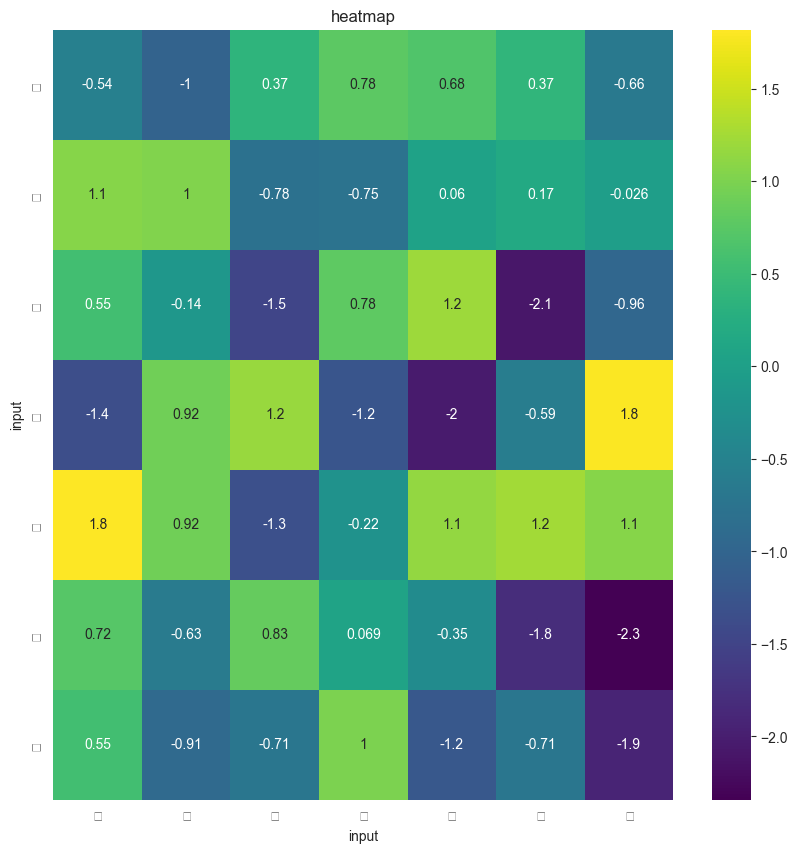

In [3]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 假设这是你的输入句子和对应的注意力权重
# 注意力权重是一个num_heads x sequence_length x sequence_length的矩阵
sentence = ["我", "是", "一", "个", "程", "序", "员"]
attention_weights = torch.randn(1, len(sentence), len(sentence))  # 假设这是模型输出的注意力权重

# 将注意力权重转换为numpy数组
attention_weights = attention_weights.numpy()

# 创建一个heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(attention_weights[0], annot=True, cmap="viridis", xticklabels=sentence, yticklabels=sentence)

# 设置字体，以便支持中文字符
# font = font_manager.FontProperties(fname='/path/to/your/font.ttf')
# ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
# ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font)

# 设置标题和标签
plt.title("heatmap")
plt.xlabel("input")
plt.ylabel("input")

# 显示图表
plt.show()

In [1]:
100352/196

512.0

In [2]:
4096/512

8.0

In [23]:
import torch
import torch.nn as nn


a = torch.randn(1, 196, 512)
b = torch.randn(1, 30, 768)

liner1 = nn.Linear(768, 512)

In [24]:
c = liner1(b)
print(c.shape)

torch.Size([1, 30, 512])


In [25]:
crossAttention = nn.MultiheadAttention(embed_dim=512,num_heads=8)

In [26]:
query = a.permute(1,0,2)
key,value = c.permute(1,0,2),c.permute(1,0,2)

In [27]:
attn_output, attn_output_weights = crossAttention(query, key, value)

In [28]:
attn_output.permute(1,0,2).shape, 

(torch.Size([1, 30, 512]),)

In [29]:
attention_weights = attn_output_weights.detach().numpy()

Text(95.72222222222221, 0.5, 'input')

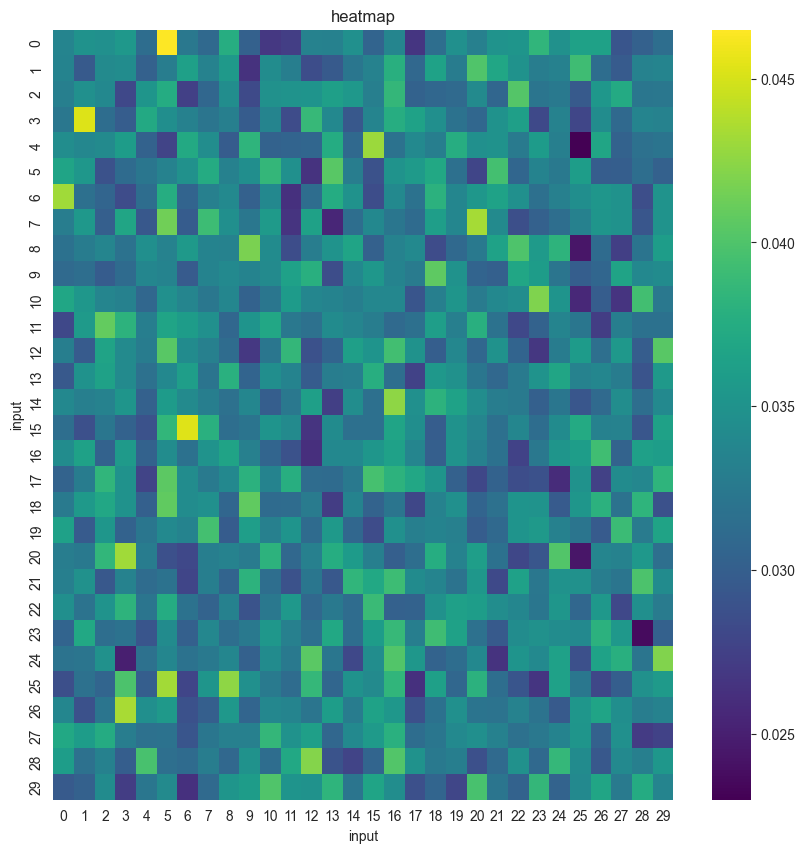

In [31]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
ax = sns.heatmap(attention_weights[0], annot=False, cmap="viridis")

plt.title("heatmap")
plt.xlabel("input")
plt.ylabel("input")

In [33]:
chart_features = torch.randn(1,196,512)
question_features = torch.randn(1,30,512)

query = chart_features.permute(1, 0, 2)
value = key = question_features.permute(1, 0, 2)
# value = question_features.permute(1, 0, 2)
attn_chart_que, attn_weights_chart_que = crossAttention(query, key, value)
print(attn_chart_que.permute(1,0,2).shape)

# query=question key=value=value
query = question_features.permute(1, 0, 2)
value = key = chart_features.permute(1, 0, 2)
attn_que_chart, attn_weights_que_chart = crossAttention(query, key, value)
print(attn_que_chart.permute(1,0,2).shape)


torch.Size([1, 196, 512])
torch.Size([1, 30, 512])


In [41]:
a = torch.randn(8, 196, 256)
b = torch.randn(8, 30, 256)

c = torch.einsum("bij,bkj->bik", a, b)

In [42]:
c.size()

torch.Size([8, 196, 30])